### Project Report Group 12

Great project and a great proposal layout. I also appreciate ensuring the code is reproducible. Some feedback regarding the different components:

Throughout the project, make sure you back up any claims you make (ex. heart disease is the greatest killer in the world) using trusted sources.

When conducting your exploratory analysis, I recommend avoiding standardizing your variables. Scaling/centering is necessary when you're building a KNN model with multiple variables. For exploratory analysis, your data loses interpretability once you scale/center.

For your graphs, I suggest using boxplots to compare variables in a more obvious manner. While scatter plots are prettier to look at, they can sometimes be less informative/confusing to interpret. Reach out if you have any questions about building/reading boxplots (geom_boxplot). Besides that, I appreciate the visualizations you created. While the histograms are useful, I recommend setting position = "identity" and not faceting the plot (unless you're putting one over the other). This allows you to compare the peak/center between individuals with/without heart disease. 

Again, i recommend not scaling the data at this stage. Also, in your final report, please make sure you spend more time interpreting your graphs in commentary. For example: "The distribution of ages of individuals diagnosed with heart disease is shifted to the right relative to those with no heart disease (i.e. they're older). Based on this, I believe age is a good predictor for heart disease."

In your methods, make sure you address how you plan on defining the best value of K. Great job with the rest of the methods section.

# Title: Heart Disease Prediction

# Legend
Figures:
- Figure 1: Predictor Histograms
- Figure 2: Predictor box plots
- Figure 3: Neighbors vs Accuracy plot

Tables:
- Table 1: All data table
- Table 2: Relevant data table
- Table 3: Heart disease count table
- Table 4: Mean of predictor variables table
- Table 5: Accuracy of various combinations of predictor variables
- Table 6: Accurcy table and confusion matrix
- Table 7: Confusion matrix percentages

# Introduction:

**Background Information**
<br>
Heart diseases are a specific group of cardiovascular diseases that refer to conditions specifically affecting the behaviour or structure of the heart. These types of diseases are the leading cause of death across the world (Cardiovascular Diseases, 2019) which explains why diagnosis at an early stage is important so that patients can get immediate treatment. Multiple underlying health conditions and lifestyle choices can increase the likelihood of heart diseases, such as diabetes, and high blood pressure. Some possible symptoms of heart disease are heart attacks, and strokes.

**Our Question:**
<br>
How accurately can we identify whether or not a patient has heart disease based on their age, resting blood pressure, and cholesterol level?

**Our Dataset:**
<br>
Our dataset is called "Heart Failure Prediction Dataset" and was obtained from kaggle (Heart Failure Prediction Dataset, 2021). It includes 11 clinical features for predicting heart disease and is a combination of 5 smaller datasets including the Cleveland, Hungarian, Switzerland, Stalog (Heart) Data Set, and Long Beach VA datasets all originally sourced from the UCI Machine Learning Repository. It contains information on health factors of patients and whether or not these patients had heart disease.

# Methods & Results:

### Import necessary libraries

In [ ]:
# import needed libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

#### Load data from source on the web 

Kaggle page for dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [ ]:
# read dataset from web
heart <- read_csv("https://raw.githubusercontent.com/josephsoo/dsci_100_group_12/main/data/heart.csv")


Rows: 918 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Wrangle and clean the data

Below we wrangle and clean the data by turning the HeartDisease column into a factor type and removing the rows
where cholesterol = 0.

Note: HeartDisease = 0 means the person *does not* have heart disease. HeartDisease = 1 means the person *does* have it.

In [ ]:
# clean and wrangle into tidy format
# by turning HeartDisease in a factor type and 
# removing rows where cholesterol = 0
heart_clean <- mutate(heart, HeartDisease = as_factor(HeartDisease)) |> filter(Cholesterol != 0)
head(heart_clean)


Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


Table 1: All data table

There are only 4 quantitative variables in this dataset that can be used to in the prediction model. Since this is a relatively small amount, we will look at all 4 in order to determine which ones will give us the highest accuracy in our classification model. 

Furthermore, when looking at the literature, studies have shown that these variables are relevant factors that can affect the likelihood of heart disease. According to the CDC high blood pressure (pressure greater than or equal to 130 mm Hg) leads to a greater risk for heart disease because the accumulation of plaque damages arteries. Having high cholesterol also increases a person's risk of heart disease excess may end up clogging arteries and restricting blood flow. A greater maximum heart rate means that a person is less likely to experience a heart attacks which are mainly caused by heart disease. The risk of heart disease increases with age due to the arteries hardening and contracting leading to a greater blood pressure.


~~We will be using 3 predictors: Cholesterol, Resting BP (blood pressure), and Age. Therefore, we will only select the releveant columns. More reasons as to why we chose these 3 can be found later on in the report.~~


WHY CHOOSE THESE 3. Literature approach or summary of data. also test other variables.

In [ ]:
heart_clean <- select(heart_clean, Age, RestingBP, Cholesterol, MaxHR, HeartDisease)
head(heart_clean)

Age,RestingBP,Cholesterol,MaxHR,HeartDisease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40,140,289,172,0
49,160,180,156,1
37,130,283,98,0
48,138,214,108,1
54,150,195,122,0
39,120,339,170,0


Table 2: Relevant data table

#### Split the data

We will now split the data into training and testing sets. 75% of the data will be used for training and 25% will be used for testing.

We have also set the seed to allow for reproducible results.

In [ ]:
set.seed(3456) 

# splitting data 75% = training, 25% = testing
heart_split <- initial_split(heart_clean, prop = 0.75, strata = HeartDisease)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

### Creating tables to summarize the training data

We have made tables showing the number of observations in each class and showing the mean of each predictor to analyze/summarize the data.

In [ ]:
# number of observations in each class of heart disease
heart_disease_count <- heart_train |> group_by(HeartDisease) |> summarize(n = n())
heart_disease_count

HeartDisease,n
<fct>,<int>
0,292
1,267


Table 3: Heart disease count table

We can see from table 3 that the split between people with and without heart disease is generally pretty even (52% of data is people without, and 48% is people with). Thus, we deem it unnessecary to balance the dataset.

In [ ]:
# averages of each predictor variable
predictor_means <- heart_train |> group_by(HeartDisease) |> summarize(across(Age:MaxHR, mean, na.rm = TRUE))
colnames(predictor_means) <- c("HeartDisease", "Age_mean", "RestingBP_mean", "Cholesterol_mean", "MaxHR_mean")
predictor_means

HeartDisease,Age_mean,RestingBP_mean,Cholesterol_mean,MaxHR_mean
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,50.56164,130.7055,237.6918,148.0445
1,56.14981,136.5693,252.3371,130.5468


Table 4: Mean of predictor variables table

The KNN model is sensitive to the scale of the data, so, if we were to not standardize our data, larger scaled predictors would be considered more strongly, when we want to consider them around equally. As we can see from table 3, cholesterol has a much larger scale than age. As a result, we can see that when we run our KNN classification, we should standardize the data.

## Creating data visualizations of the training data



#### Histograms and Box Plots

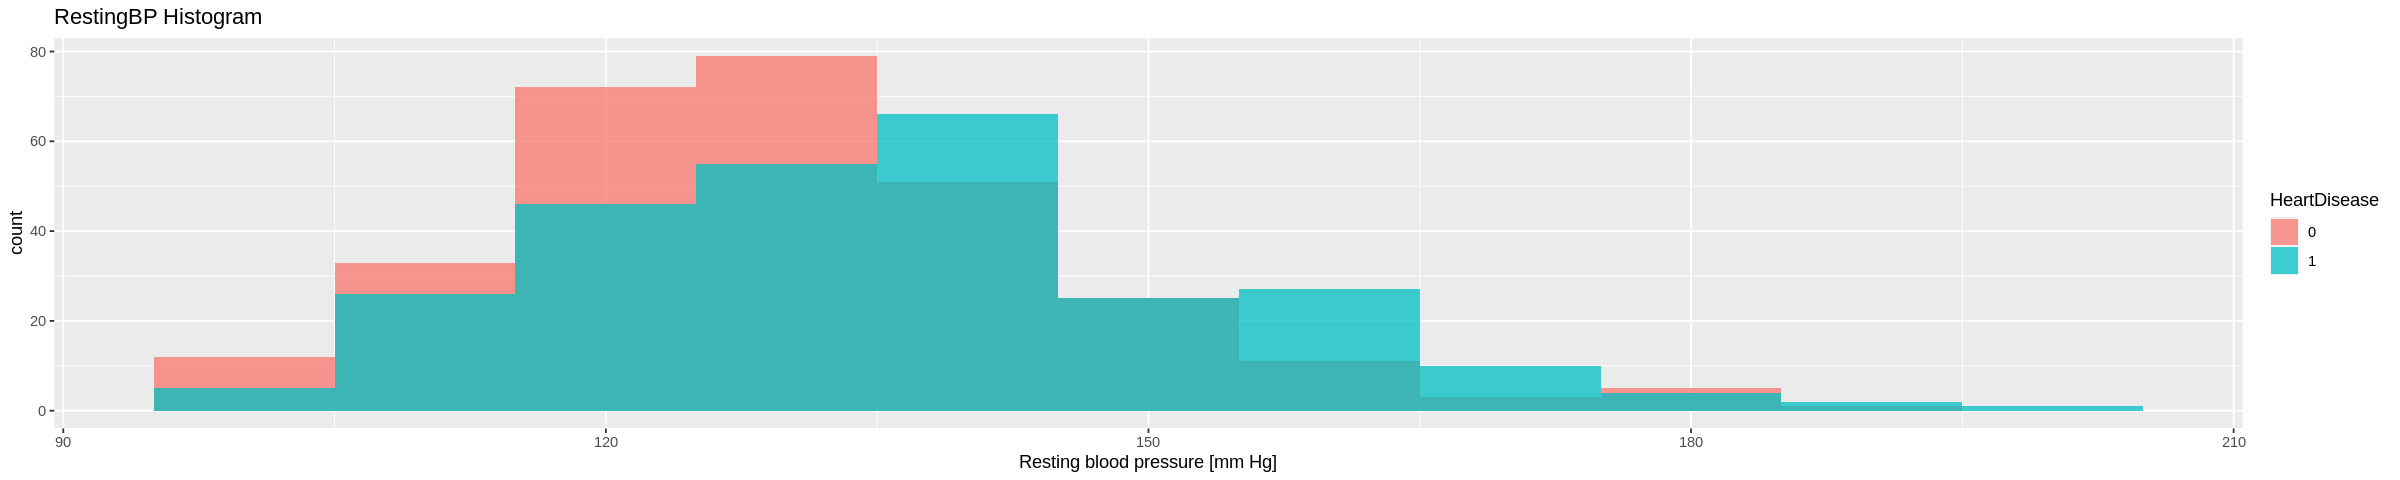

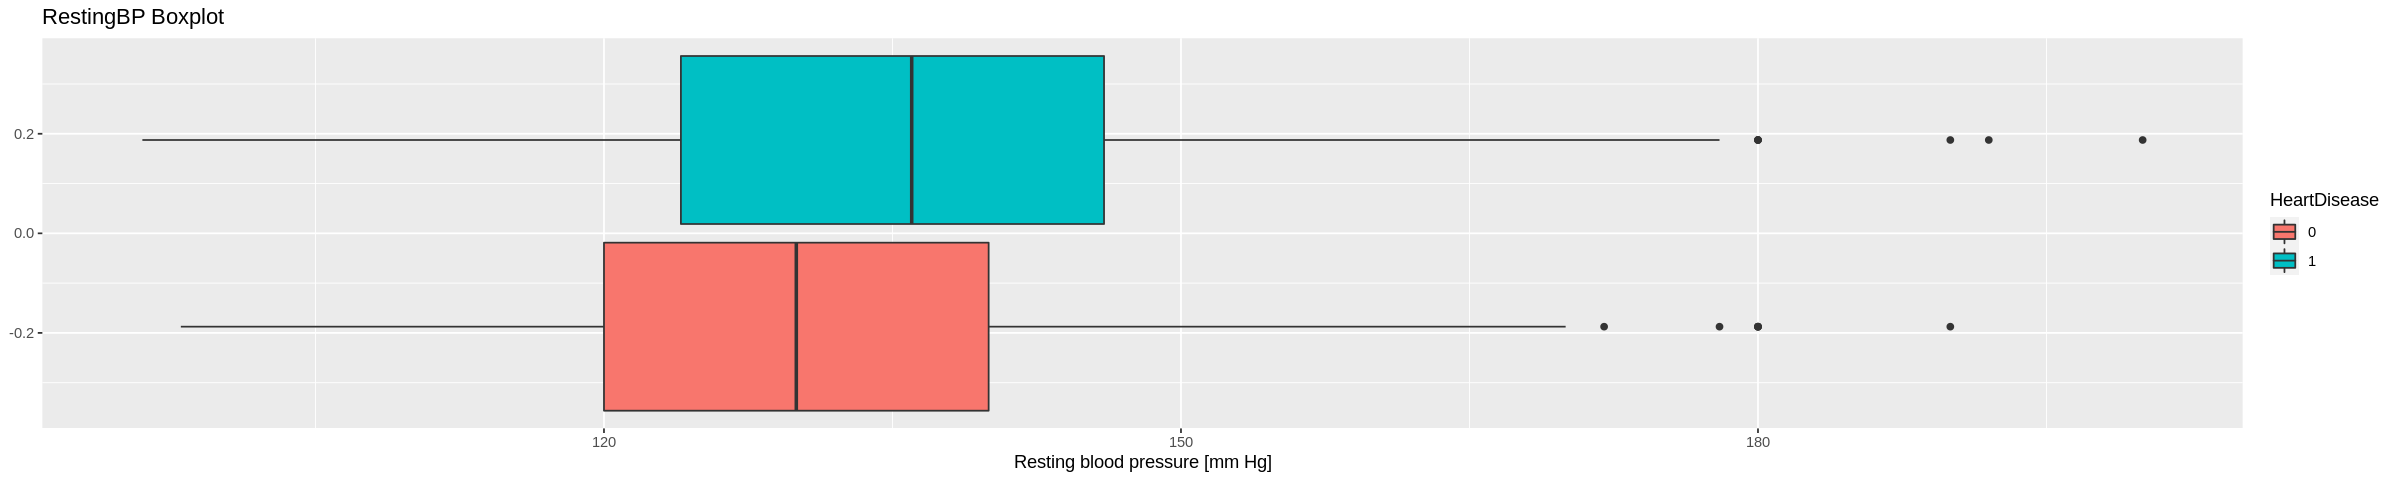

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 4)

bp_histo <- heart_train |> ggplot(aes(x = RestingBP, fill = HeartDisease)) +
    geom_histogram(position = "identity", binwidth = 10, alpha = 0.75) +
    labs(title = "RestingBP Histogram", x = "Resting blood pressure [mm Hg]")

bp_box <- heart_train |> ggplot(aes(x = RestingBP, fill = HeartDisease)) +
    geom_boxplot()+
labs(title = "RestingBP Boxplot", x = "Resting blood pressure [mm Hg]")


bp_histo

bp_box

Figures 1 and 2 demonstrate the distribution of resting blood pressure for people with and without heart disease. As we can see, there is some difference in distribution; the median is greater for people with heart disease, however, the overlatp of the interquartile range of each boxplot overlap with the medians, and so the distinction is not as strong as some of the other predictors we ew

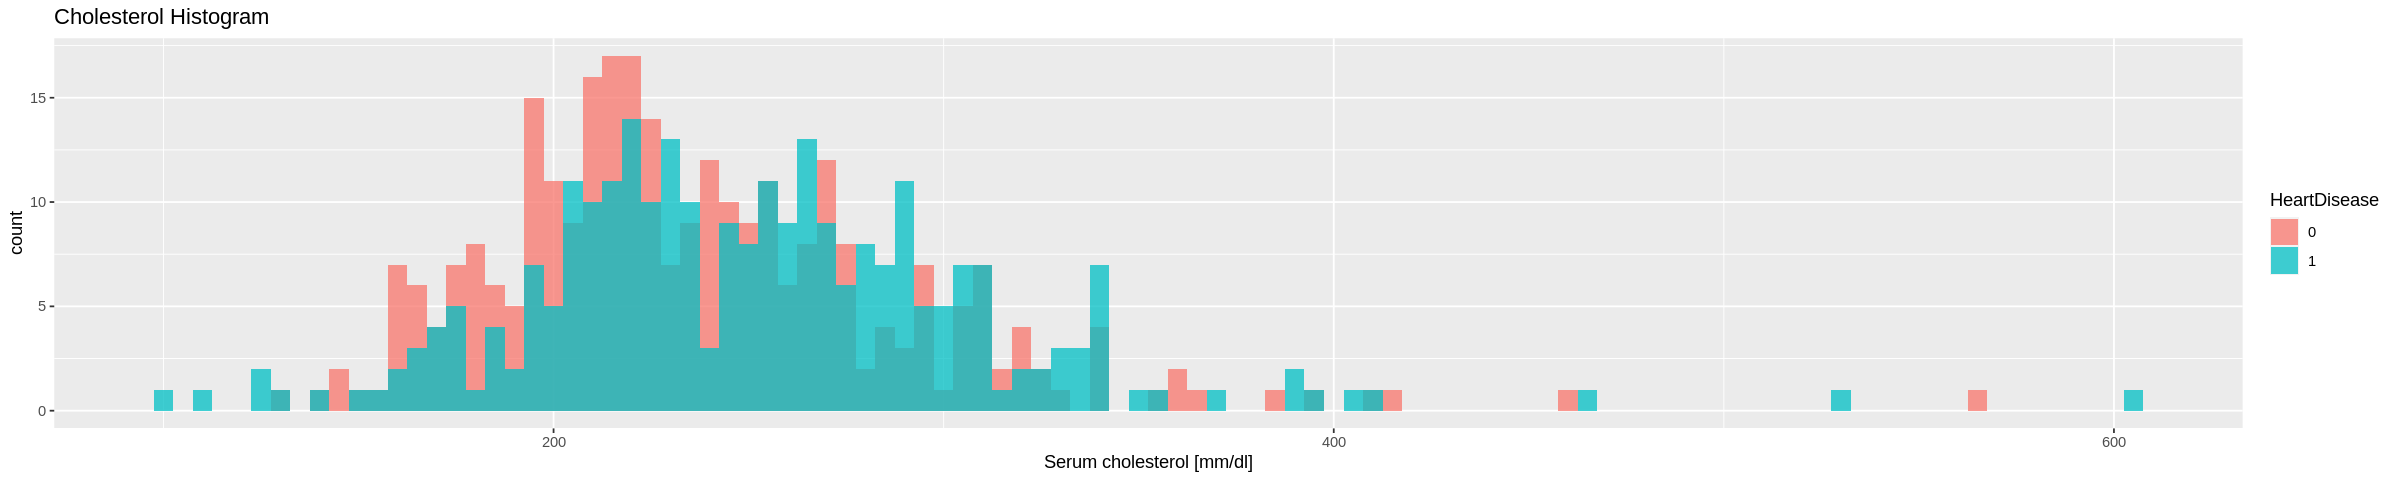

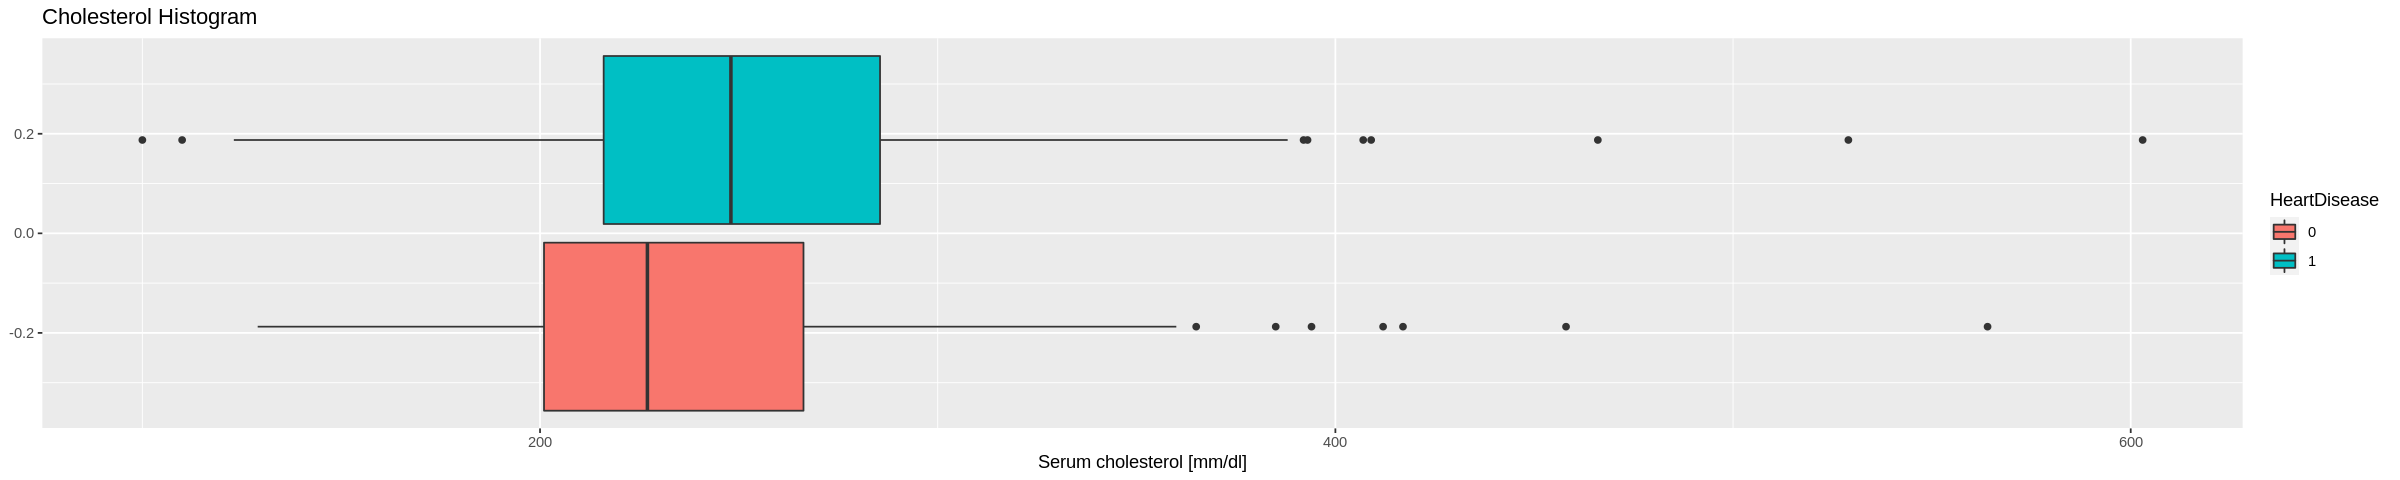

In [ ]:
cholesterol_histo <- heart_train |> ggplot(aes(x = Cholesterol, fill = HeartDisease)) +
    geom_histogram(position = "identity", binwidth = 5, alpha = 0.75) +
    labs(title = "Cholesterol Histogram", x = "Serum cholesterol [mm/dl]")

cholesterol_box <- heart_train |> ggplot(aes(x = Cholesterol, fill = HeartDisease)) +
    geom_boxplot()+
labs(title = "Cholesterol Histogram", x = "Serum cholesterol [mm/dl]")

cholesterol_histo
cholesterol_box

Figures 3 and 4 demonstrate the distribution of the cholesterol for people with cholestrol and people without. As we can see, there is a difference between the distributions - the median for people with heart disease is greater than the median for those without, however, as the overlap of the interquartile ranges overlap with the medians, so the difference isn't very pronounced.

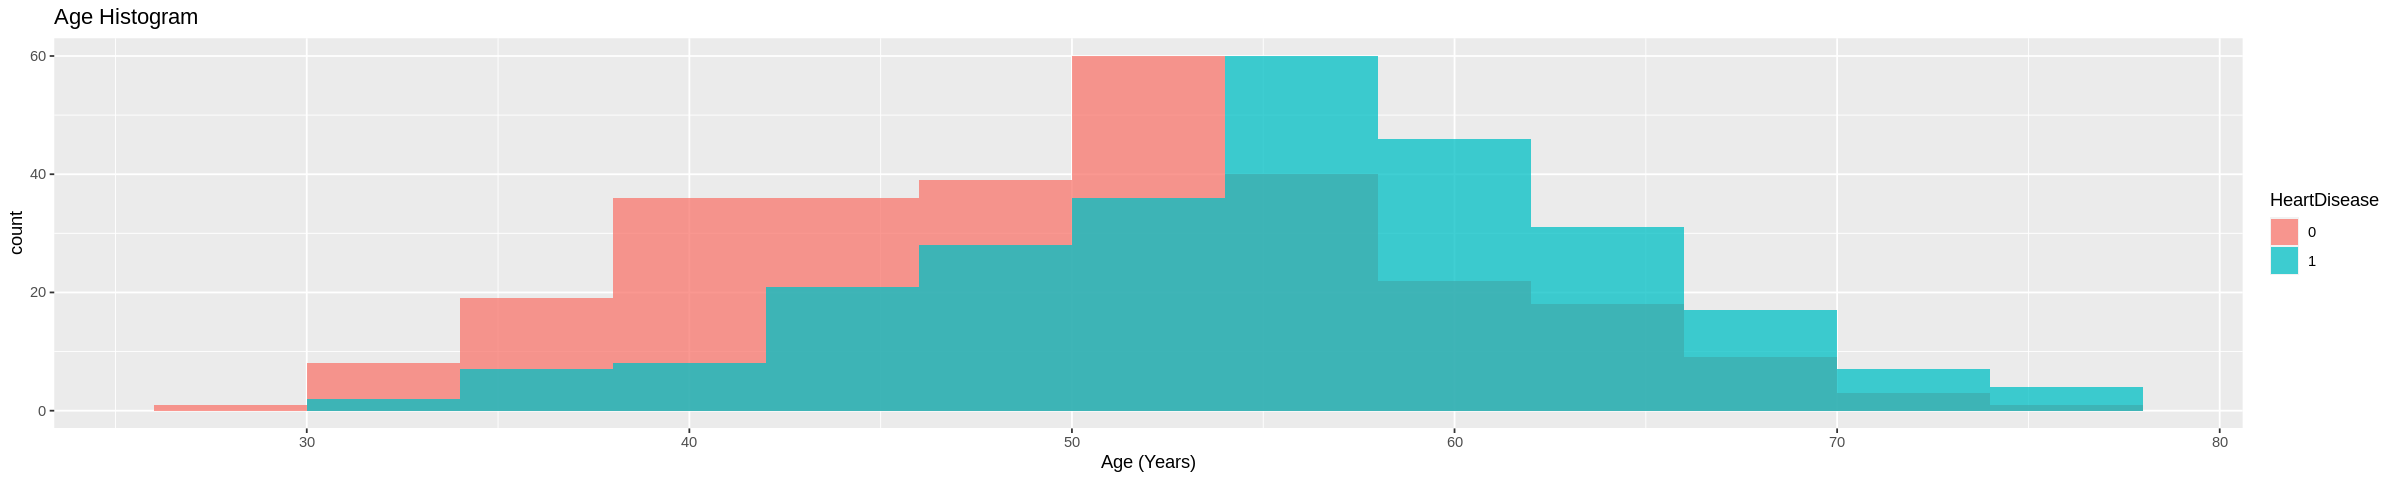

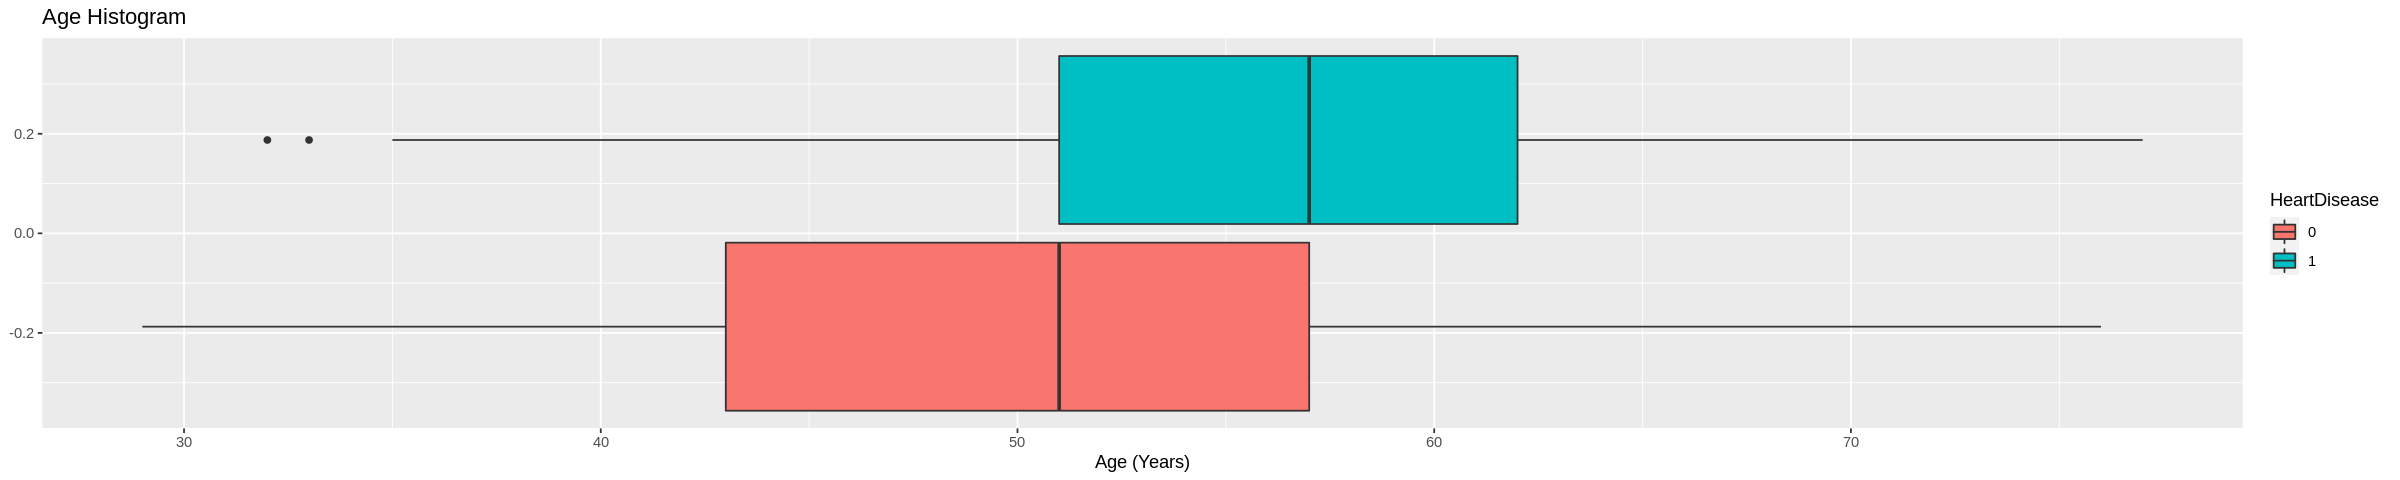

In [ ]:
age_histo <- heart_train |> ggplot(aes(x = Age, fill = HeartDisease)) +
    geom_histogram(position = "identity", binwidth = 4, alpha = 0.75) +
    labs(title = "Age Histogram", x = "Age (Years)")

age_box <- heart_train |> ggplot(aes(x = Age, fill = HeartDisease)) +
    geom_boxplot()+
    labs(title = "Age Histogram", x = "Age (Years)")

age_histo
age_box

Figures 5 and 6 show the distribution of age amoung people with heart disease and people without. As we can see from the data, the distributions are different - the median are on the edge of the overlap between the interquartile ranges. These distributions overlap less than figures 1 to 4.

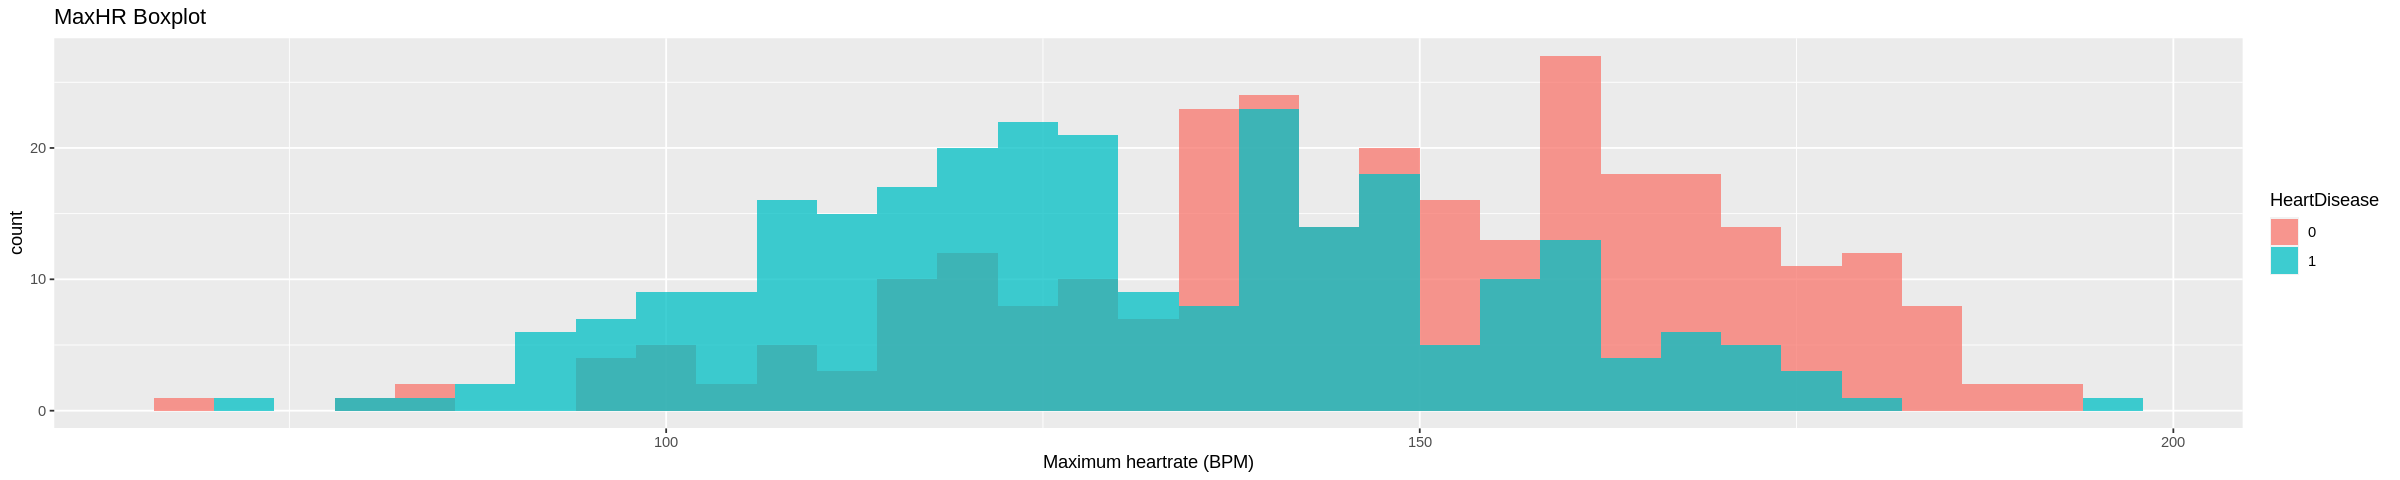

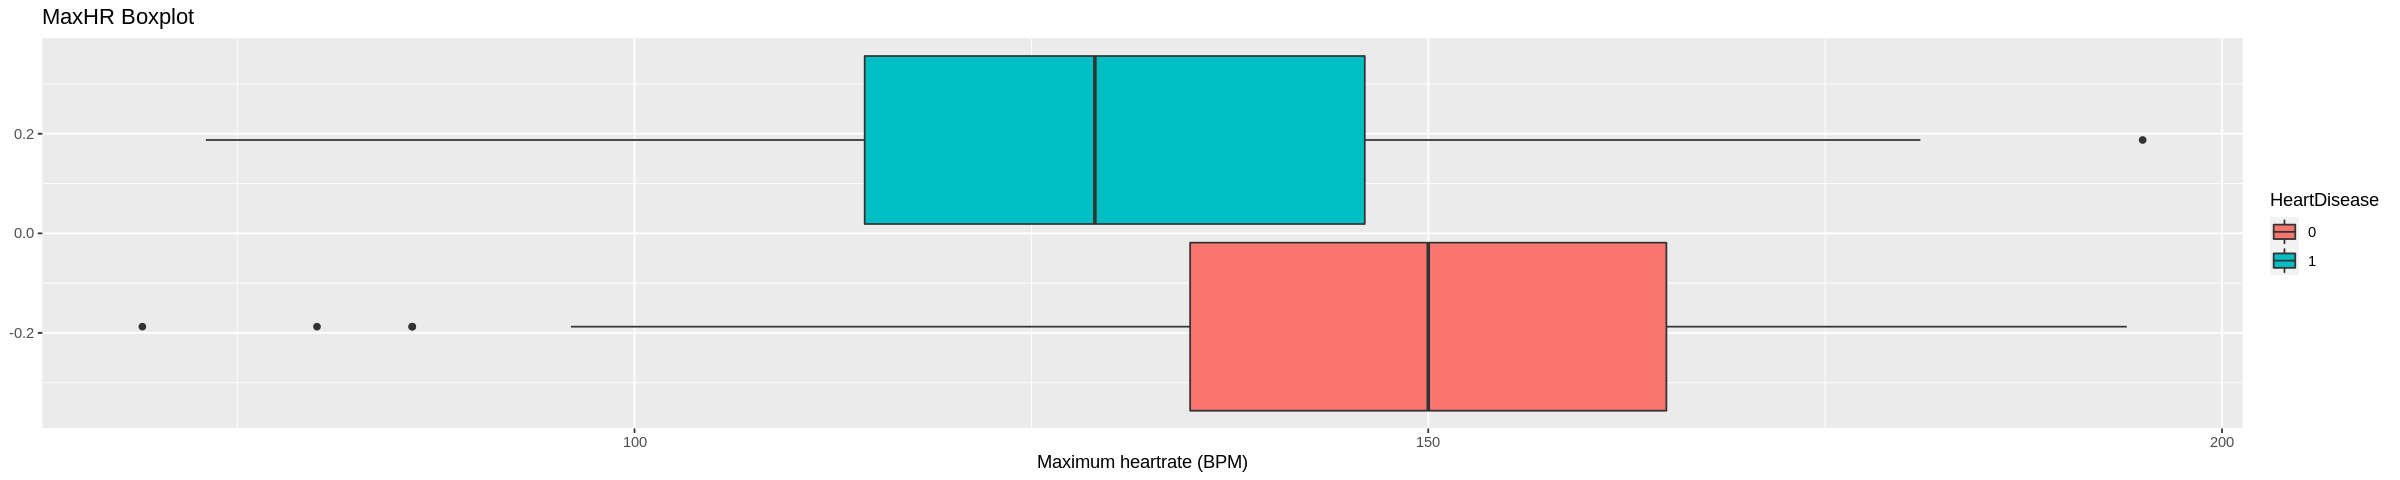

In [ ]:
maxhr_histo <- heart_train |> ggplot(aes(x = MaxHR, fill = HeartDisease)) +
    geom_histogram(position = "identity", binwidth = 4, alpha = 0.75) +
labs(title = "MaxHR Boxplot", x = "Maximum heartrate (BPM)")

maxhr_box <- heart_train |> ggplot(aes(x = MaxHR, fill = HeartDisease)) +
    geom_boxplot()+
labs(title = "MaxHR Boxplot", x = "Maximum heartrate (BPM)")

maxhr_histo
maxhr_box

Figures 7 and 8 show the distribution for the maximum heartrate of people with and without heart disease. As we can see from the figures, the distributions are quite different, as both medians do not overlap with the overlap between the interquatile ranges. From these visualizations, it seems that the maximum heartrate may make a very good predictor for heart disease as the distributions do not overlap much.

#### Summary:

In general, we can see from the visualizations above (figures 1-8) that people with heart disease tend to have higher resting blood pressure, cholesterol, be older, and have a lower maximum heartrate.

### Choosing a Combination of Predictor Variables Through Forward Selection

Before we begin the construction of the prediction model, we want to see what combination of predictor variables will result in the highest prediction accuracy. Currently, we have selected all possible quantitative variables to be our predictors, but it may be the case that some of them are actually irrelevant. 

To determine the best combination of predictor variables, we will use forward selection. Forward selection is the process of iteratively building up a model and determining its accuracy by adding one predictor variable at a time (Timbers, 2022).

In the forward selection code below, we used a 3-fold cross-valiadation to determine the accuracy of each combination of predictor variables. 3-folds were used due to the time it takes for the code to run growing with a higher number of folds.

In [ ]:
set.seed(3456) 

heart_scaled <- heart_train |>
    mutate(scaled_Cholesterol = scale(Cholesterol, center = TRUE),
        scaled_RestingBP = scale(RestingBP, center = TRUE),
        scaled_Age = scale(Age, center = TRUE),
        scaled_MaxHR = scale(MaxHR, center = TRUE))|>
    select(HeartDisease, scaled_Cholesterol, scaled_RestingBP, scaled_Age, scaled_MaxHR)

heart_subset <- heart_scaled |>
    select(HeartDisease,
           scaled_Age,
           scaled_Cholesterol,
           scaled_RestingBP,
           scaled_MaxHR)
names <- colnames(heart_subset |> select(-HeartDisease))
#heart_subset

formula <- paste("HeartDisease", "~", paste(names, collapse="+"))
formula

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 3-fold cross-validation object
heart_vfold <- vfold_cv(heart_subset, v = 3, strata = HeartDisease)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("HeartDisease", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        heart_recipe <- recipe(as.formula(model_string), 
                                data = heart_subset) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(heart_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = heart_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

[1] "HeartDisease ~ scaled_Age+scaled_Cholesterol+scaled_RestingBP+scaled_MaxHR"

size,model_string,accuracy
<int>,<chr>,<dbl>
1,HeartDisease ~ scaled_MaxHR,0.6440400
2,HeartDisease ~ scaled_MaxHR+scaled_Age,0.6922929
3,HeartDisease ~ scaled_MaxHR+scaled_Age+scaled_Cholesterol,0.6994710
4,HeartDisease ~ scaled_MaxHR+scaled_Age+scaled_Cholesterol+scaled_RestingBP,0.6852203


Table 5: Accuracy of various combinations of predictor variables

From the forward selection process, we can see that the combination that gives us the highest accuracy is the one with Max HR, Age, and Cholesterol. Thus, going forward we will use this combination of predictor variables.

## Predictions:

### Tuning model and finding best k-value:

To begin, we will first determine the best value of $K$ (tune the model) using the cross-validation method taught in class. We have chosen 10 folds and we will test values of $K$ ranging from 1 to 25.

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
17,accuracy,binary,0.6974937,10,0.02134103,Preprocessor1_Model17
18,accuracy,binary,0.6974937,10,0.02134103,Preprocessor1_Model18


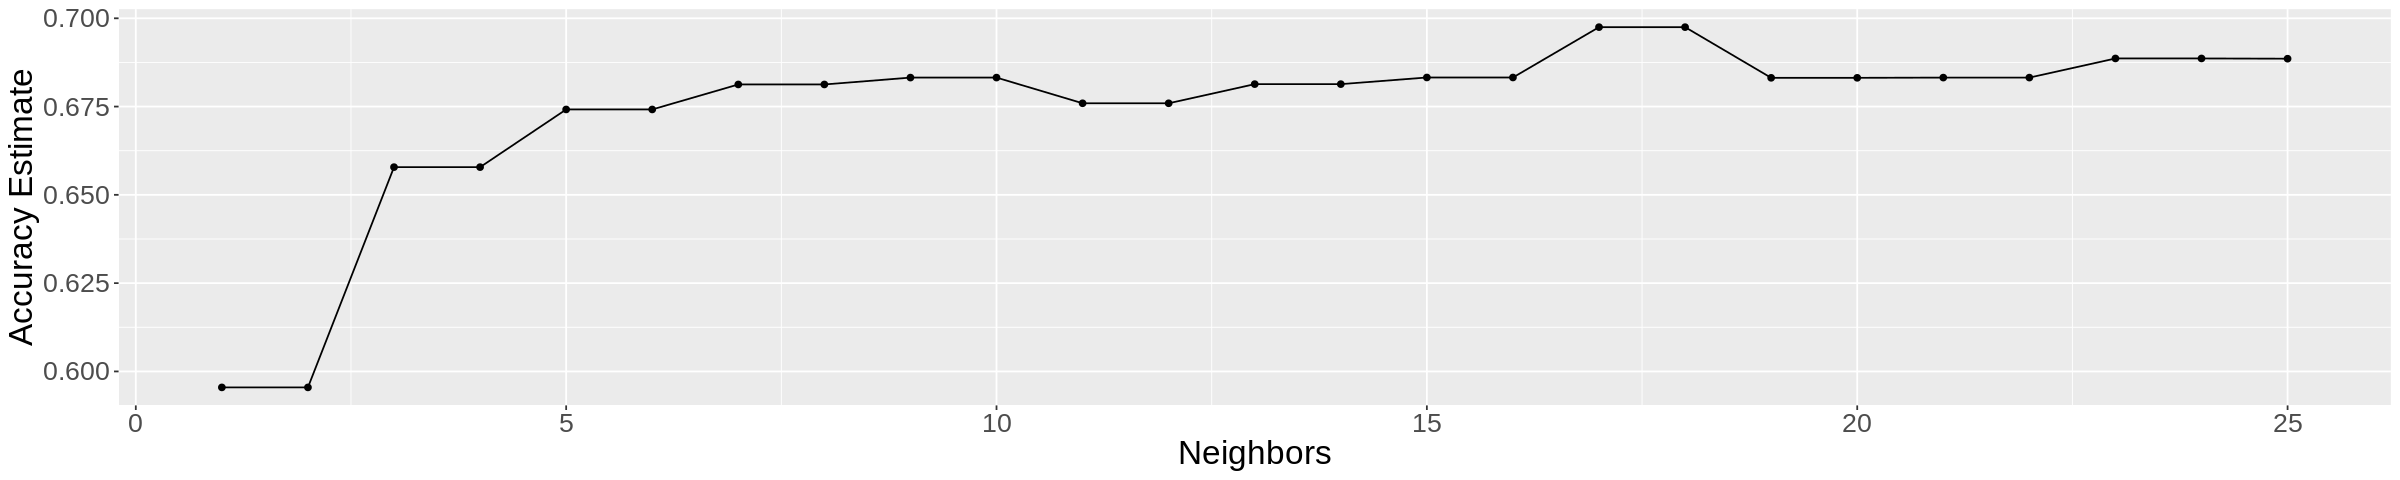

In [ ]:
# Set the seed for reproducible results
set.seed(3456) 

# Split training data into folds
heart_vfold <- vfold_cv(heart_train, v = 10, strata = HeartDisease)

# Create recipe
heart_recipe <- recipe(HeartDisease ~ Cholesterol + MaxHR + Age, data = heart_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# Create knn classification specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# Testing the K values of 1 - 25
gridvals <- tibble(neighbors = seq(1, 25))

# Run cross-validation and collect metrics
knn_results <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = heart_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

# Plotting k values against their respective accuracies and choose optimal k value
cross_val_plot <- knn_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))

max <- knn_results |>
   arrange(desc(mean)) |> 
   slice(1, 2)

max


cross_val_plot

Figure 9 shows the neighbours vs accuracy plot

As we can see from the above accuracy vs neigbors plot, k = 17 or 18 (17 or 18 neighbors) has a very high accuracy. As $K = 17$ will be less computationally expensive than  $K = 18, we will choose a $K$ value of 17 in our prediction model.

### Creating and testing model with chosen k value:

Below, we create a knn specification using `neighbors = 17` and use the model we create to predict on our testing set. We then use this to deterrmine the accuracy of our model on the testing set.

In [ ]:
# Creating knn specification using best k-value
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 17) |>
  set_engine("kknn") |>
  set_mode("classification")

# Fit the model
heart_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = heart_train)

# Use model to predict on testing set
heart_predictions <- predict(heart_fit, heart_test) |> 
    bind_cols(heart_test)

# Comparing the accuracy of predictions to the data in the test set
heart_acc <- heart_predictions |> 
    metrics(truth = HeartDisease, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)

heart_acc

# Comparing the predictions to the real values in a confusion matrix
heart_cm <- heart_predictions |> 
    conf_mat(truth = HeartDisease, estimate = .pred_class)

heart_cm

.metric,.estimate
<chr>,<dbl>
accuracy,0.684492


          Truth
Prediction  0  1
         0 72 33
         1 26 56

Table 6: Accurcy table and confusion matrix

Our model has an accuracy of 0.68. To further analyze this result, we will visualize the confusion matrix. 

### Visualizing results of model:

Since the false positive and negative rate is very important when dealing with health and clinical situtations, we have created visualizations to show the false positive and negative rates of our model below.

Further discussion on the impacts and importance of these rates can be found below and in the discussion section.

#### Tidying confusion matrix:

To tidy the confusion matrix, we have:
- Turned it into a data frame
- Converted counts to percentages
- Turned names into human readable labels (false positive, true positive, etc.)

In [ ]:
# Turn conf_mat into tibble and add percent column
percent_heart_cm <- tidy(heart_cm) |> mutate(percent = value / sum(value))

# Create dataframe with human readable values for name column and with percentage column
readable_percent_heart_cm <- data.frame(name = c("True Negative", "False Positive", "False Negative", "True Positive"), percent = percent_heart_cm$percent)

readable_percent_heart_cm

name,percent
<chr>,<dbl>
True Negative,0.3850267
False Positive,0.1390374
False Negative,0.1764706
True Positive,0.2994652


Table 7: Confusion matrix percentages

#### Plotting data:

We have to visualizations of the data:

1. A heatmap plot which is a visual representation of the actual confusion matrix

2. A bar chart showing the percentages of each cell in the matrix

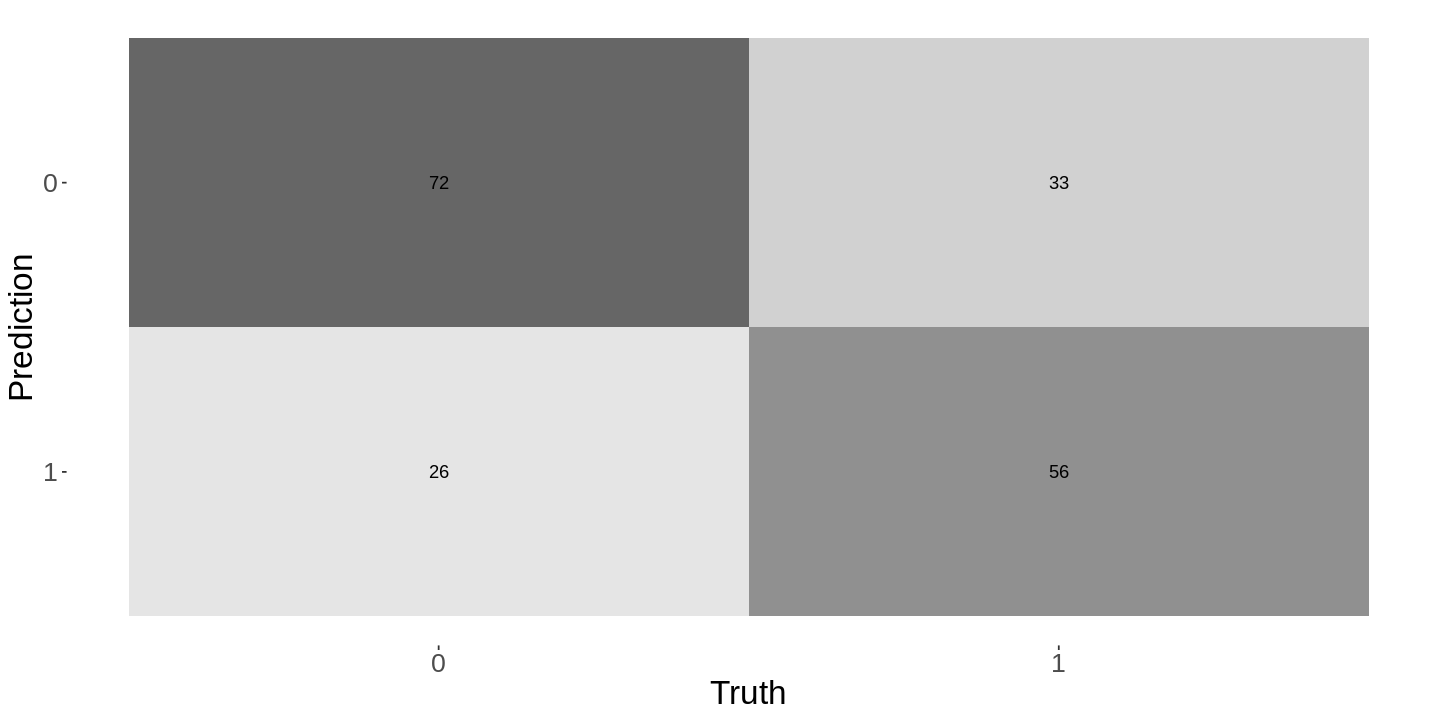

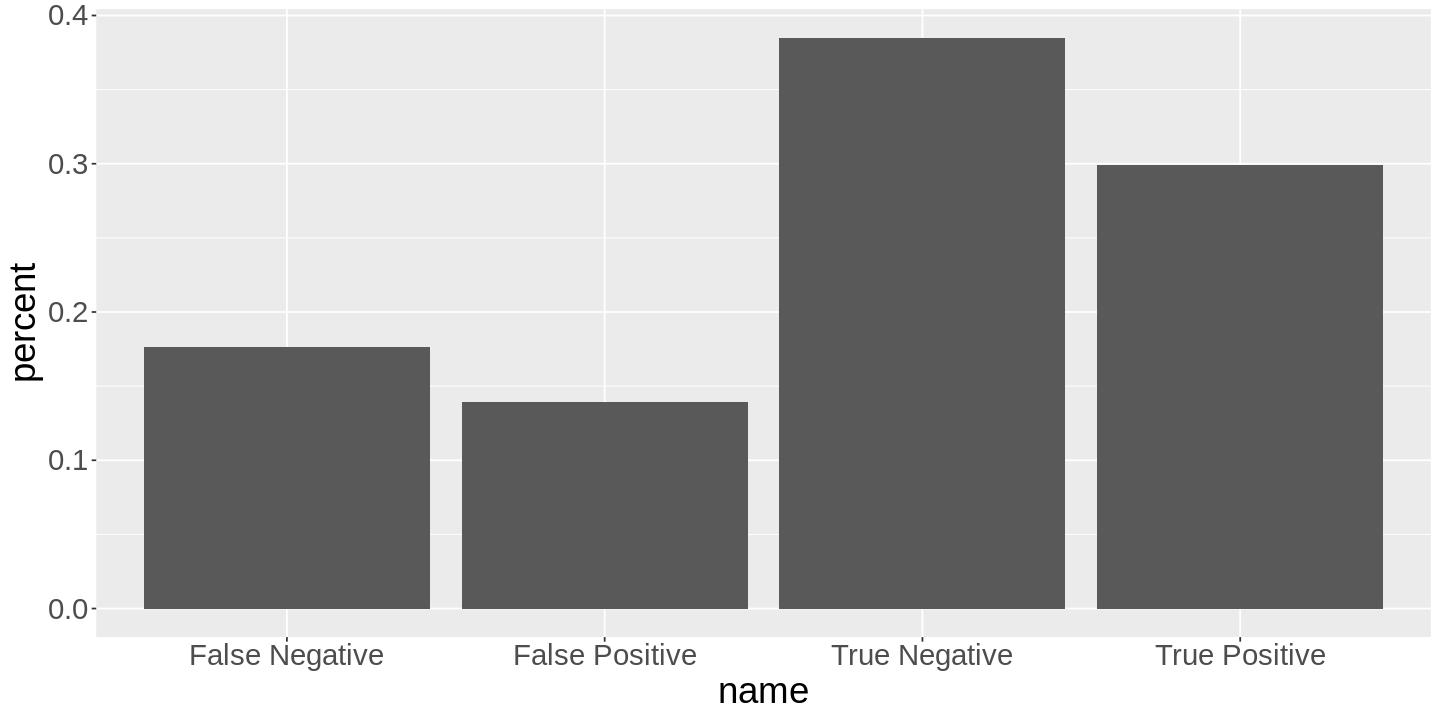

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 6)

autoplot(heart_cm, type = "heatmap") +
    theme(text = element_text(size = 20))

conf_mat_plot <- ggplot(readable_percent_heart_cm, aes(x = name, y = percent)) +
    geom_bar(stat = "identity") +
    theme(text = element_text(size = 22))

conf_mat_plot

Figure 4: Confusion matrix visualizations

#### Analysis of confusion matrix and accuracy:

From the plots, we can see that the true negative and positive rates are the highest, but not by a great margin. The true rates are around 30 - 40% while the false rates are around 14- 18%. In the context of a clinical model, we deem these false pos/neg. rates to be too high and the true rates to be too low. Furthermore, our model's accuracy is about 68% which we also deem to be too low.

Why are the false pos/neg. rates too high and the accuracy too low? If we use this model to predict heart disease in 100 patients, about 14 patients will be misdiagnosed with having/potential of having heart disease, leading to unecessary anxiety and treatments which are costly and time consuming. On the other hand about 18 patients will be misdiagnosed as healthy when they are at risk of having hart disease. This can potentially lead to death or other serious health issues. In healthcare, accuracy is very important and we want the lowest false pos/neg rates possible (or highest accuracy), and 14-18% is simply too high.

## Discussion:

#### summarize what you found

... During our exploratory analysis, we noticed a few trends between our predictor variables, resting blood pressure, age, cholesterol level, and whether or not the patient had heart disease. Through the usage of box plots and histograms, we concluded that a person would be more likely to have heart disease with greater resting blood pressure, age and cholesterol. We were able to create a classifier using k-nearest neighbors that could diagnose a patient correctly around 60.9% of the time given these 3 predictor variables. A prediction accuracy this low wouldn't be appropriate in a real scenario due to the impact of predicting incorrectly being a potential loss of human life. ...

#### discuss whether this is what you expected to find?
#### discuss what impact could such findings have?
#### discuss what future questions could this lead to?
One question that could be analyzed for future exploration, is seeing what other parameters may serve as better predictors for determining how likely a given patient is to have heart disease. Within the scope of the dataset we analysed, the explored combination of parameters did not achieve the outcome we hoped for when it comes to prediction accuracy. Hence, by exploring other data sets that have more variables for analysis such as VO2 Max, or resting heart rate, we may find that they are more indicative of the likelihood for someone to have heart disease. 

## References

Cardiovascular diseases. (2019, June 11). World Health Organization. https://www.who.int/health-topics/cardiovascular-diseases

Heart Failure Prediction Dataset. (2021, September 10). Kaggle. https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

Timbers, T. T. C. (2022, September 24). Chapter 6 Classification II: evaluation & tuning | Data Science. https://datasciencebook.ca/classification2.html